# Naive Bayes Classifier Building in Scikit-learn

In [49]:
# Defining dataset

# assigning features and label variables

weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast',
           'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
        'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
        'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [50]:
## Encoding Features

## import labelEncoder
from sklearn import preprocessing

## creating labelEncoder
le = preprocessing.LabelEncoder()

## converting string labels into numbers
weather_encoded = le.fit_transform(weather)

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [51]:
## converting string labels into numbers
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)

print('Temp : ', temp_encoded)
print('Play : ', label)

Temp :  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play :  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [52]:
## Combinin gweather and temp into single list of tuples

features = list(zip(weather_encoded, temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [53]:
## import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

## create gaussian classifier
model = GaussianNB()

## train the model using the training sets
model.fit(features, label)

## predict output
predicted = model.predict([[0, 2]]) # 0:overcast, 2:mild
print(f'Predicted Value : {predicted}')

Predicted Value : [1]


# Naive Bayes with Multiple Labels

In [54]:
## load dataset

from sklearn import datasets

wine = datasets.load_wine()

In [55]:
## print the names of the 13 features
print(f'Features : {wine.feature_names}')

## print the label type of wine(class_0, class_1, class_2)
print(f'Labels : {wine.target_names}')

Features : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels : ['class_0' 'class_1' 'class_2']


In [56]:
## print data(feature)shape

wine.data.shape

(178, 13)

In [57]:
## print the wine data features (top 5 records)

print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [58]:
## print the wine labels (0:class_0, 1:class_2, 2:class_2)

print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [59]:
# import train_test_split function
from sklearn.model_selection import train_test_split


# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=109)

In [60]:
## import gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

## create a gaussian classifier 
gnb = GaussianNB()

## train the model using training sets
gnb.fit(X_train, y_train)

## predict the response for test dataset
y_pred = gnb.predict(X_test)

In [61]:
## import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

## model accuracy, how often is the classifier correct?
print(f'Accuracy : {metrics.accuracy_score(y_test, y_pred)}')

Accuracy : 0.9074074074074074


# Decision Tree Classifier

## Decision Tree Classifier Building in Scikit-learn

In [62]:
## Decision Tree Classifier Building in Scikit-learn
import pandas as pd

## import  decision tree classifier
from sklearn.tree import DecisionTreeClassifier

## import train_test_split funciton
from sklearn.model_selection import train_test_split

## import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [63]:
col_names: ['pregnant', 'glucose', 'bp', 'skin',
            'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv")

In [64]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
## Feature Selection
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
numer = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose','BloodPressure','Outcome', 'DiabetesPedigreeFunction', 'SkinThickness']

## coerce for missing values

for col in numer:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [67]:
pima.dropna(inplace=True)

In [68]:
## split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose','BloodPressure', 'DiabetesPedigreeFunction']

X = pima[feature_cols]
y = pima['Outcome']

In [69]:
## split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
## create decision tree classifier object
clf = DecisionTreeClassifier()

## train decision tree classifier
clf = clf.fit(X_train, y_train)

## predict the response for test dataset
y_pred = clf.predict(X_test)

In [71]:
print(f'Accuracy{metrics.accuracy_score(y_test, y_pred)}')

Accuracy0.683982683982684


## Visualizing Decision Trees

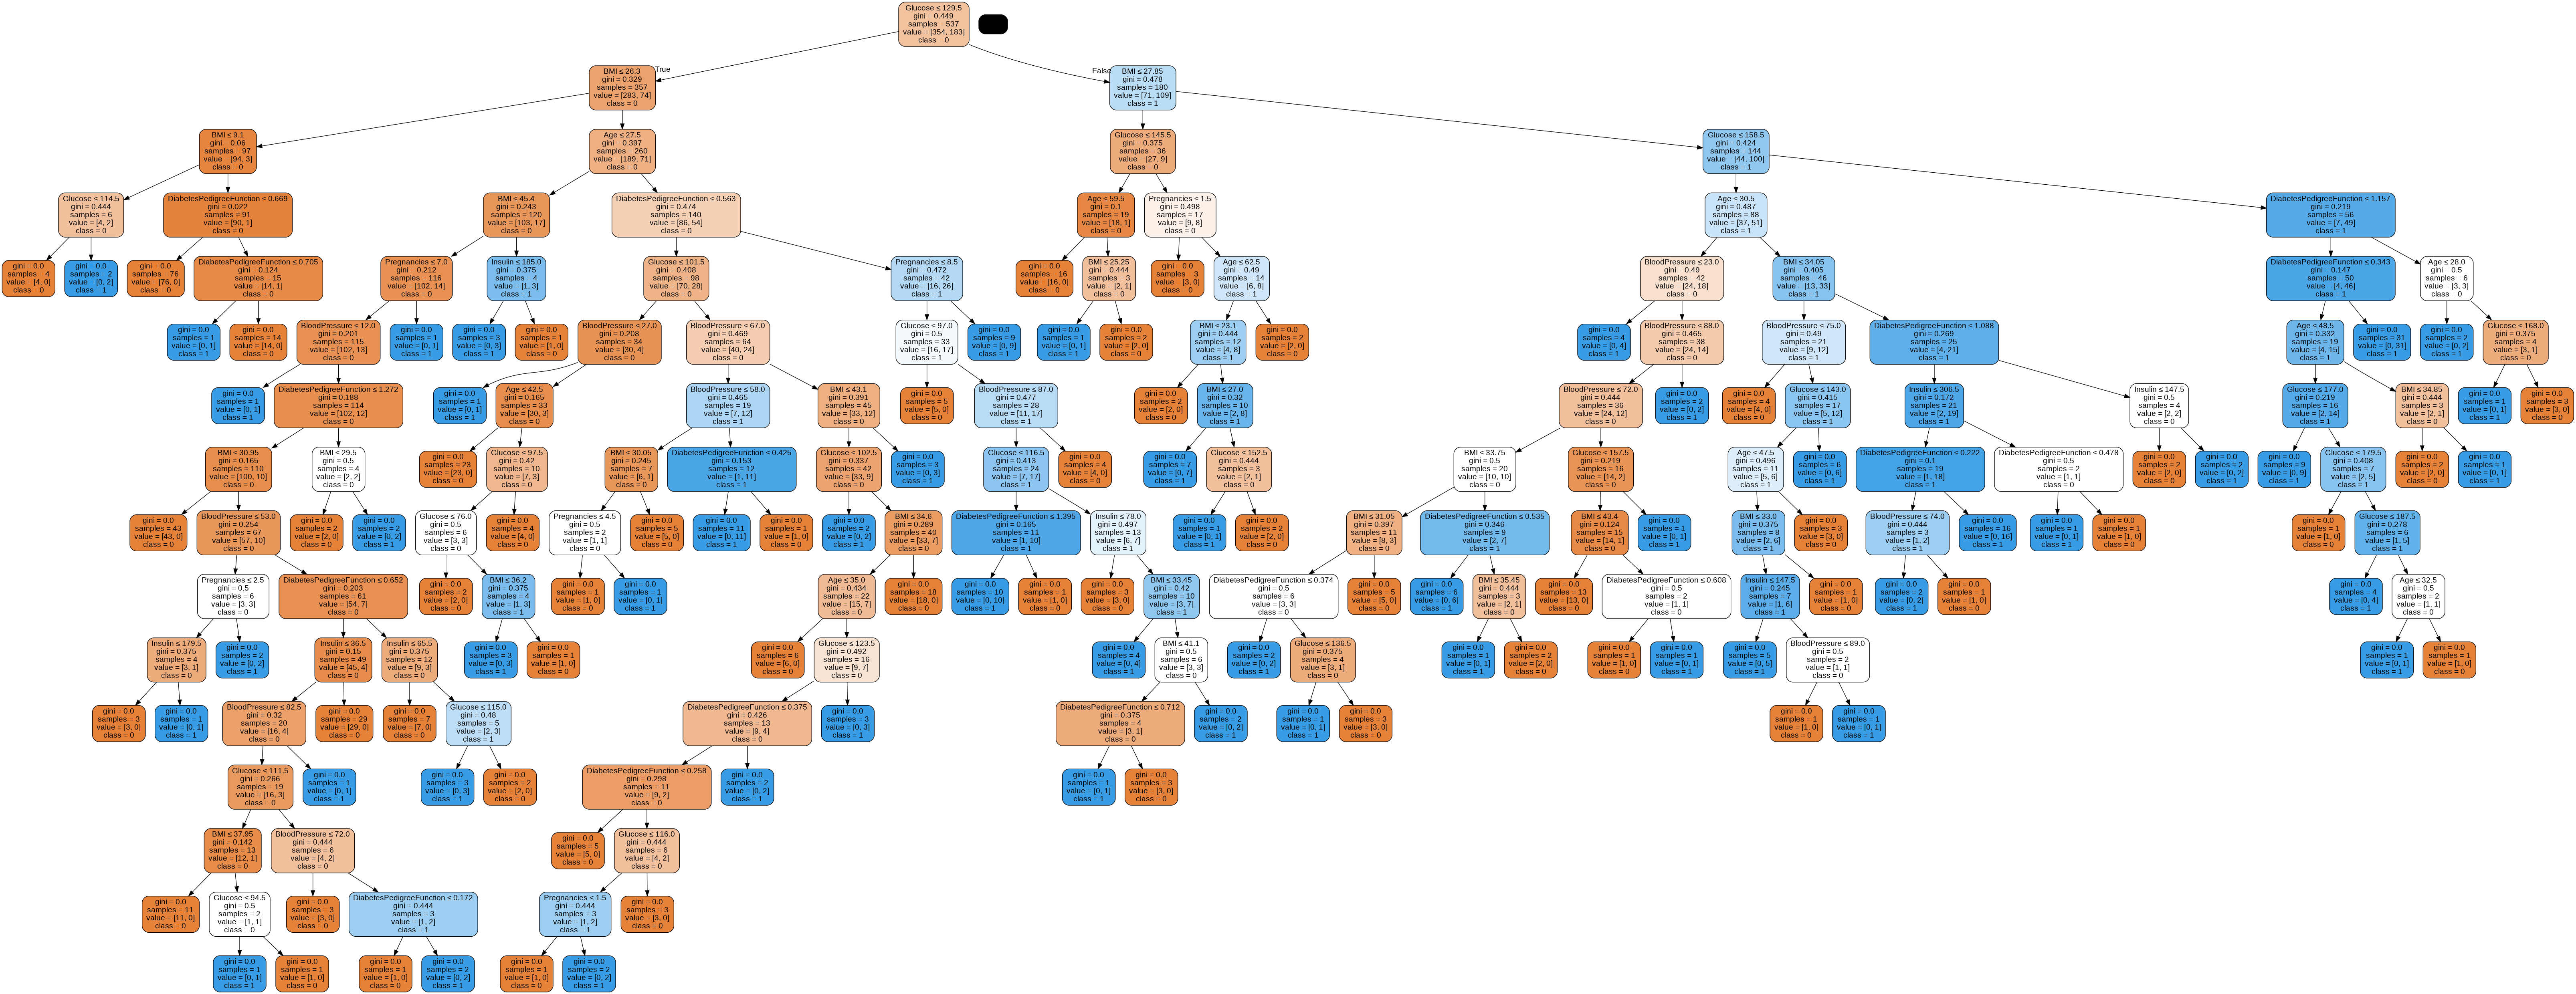

In [72]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file=dot_data,
                     class_names=['0', '1'], ## target names
                     feature_names=feature_cols, ## feature names
                     filled=True, ## fill in the boxes with colours
                     rounded=True, ## round the corners of the boxes
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Optimizing Decision Tree Performance

In [73]:
## Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

## train decision tree classifier
clf = clf.fit(X_train, y_train)

## predict the response for test dataset
y_pred = clf.predict(X_test)

## model accuracy, how often is the classifier correct
print(f'Accuracy : {metrics.accuracy_score(y_test, y_pred)}')

Accuracy : 0.7705627705627706


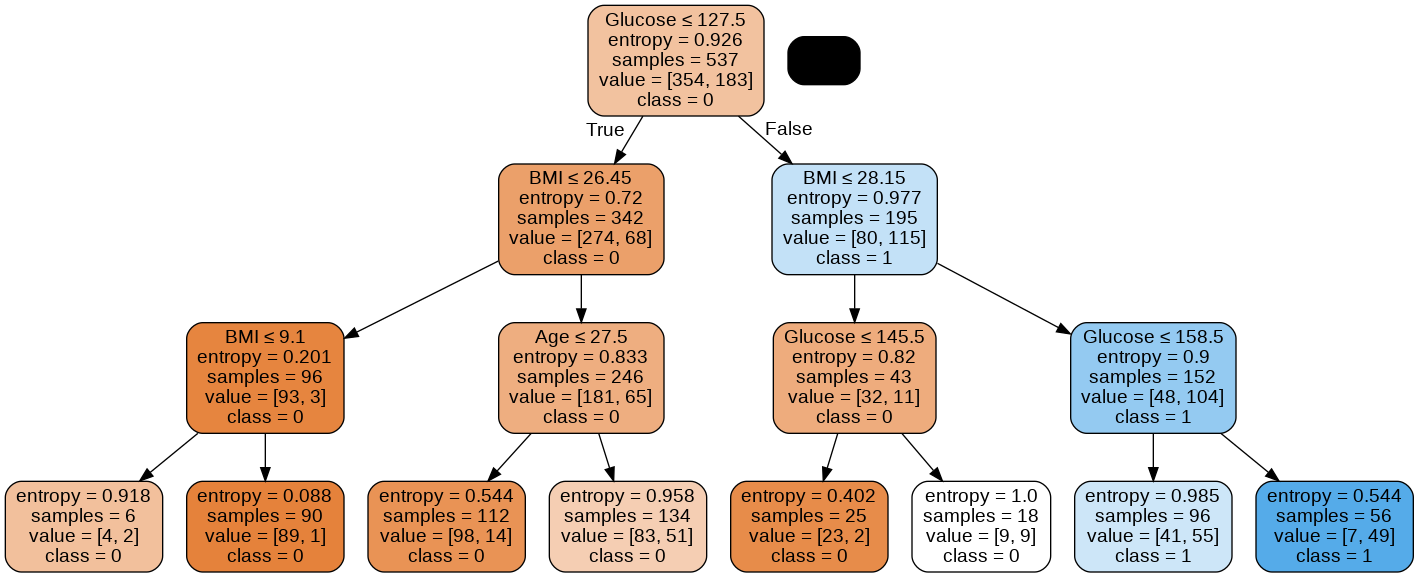

In [74]:
dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file=dot_data,
                     class_names=['0','1'], # the target names.
                     feature_names=feature_cols, # the feature names.
                     filled=True, # Whether to fill in the boxes with colours.
                     rounded=True, # Whether to round the corners of the boxes.
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Random Forest

## Building Classifier using Scikit-learn

In [75]:
from sklearn import datasets

## Load dataset
iris = datasets.load_iris()

In [76]:
## print label species(setosa, versicolor, virginica)
print(iris.target_names)

## print the names of four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [77]:
## iris data top 5 records
print(iris.data[0:5])

## iris labels (0:sentosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [78]:
## create dataframe of given iris dataset
import pandas as pd

data = pd.DataFrame({
    'sepal_length':iris.data[:,0],
    'sepal_width':iris.data[:,1],
    'petal_length':iris.data[:,2],
    'petal_width':iris.data[:,3],
    'species':iris.target
})

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
## splitting dataset

from sklearn.model_selection import train_test_split

X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',]]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
## import random forest model
from sklearn.ensemble import RandomForestClassifier

## create gaussian classifier
clf = RandomForestClassifier(n_estimators=100)

## train the model using traing set y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [81]:
## import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

## model accuracy, how often is the classifier correct
print(f'Accuracy : {metrics.accuracy_score(y_test, y_pred)}')

Accuracy : 0.9777777777777777


In [82]:
## make a prediction for each item
clf.predict([[3, 5, 4, 2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

'2' shows the type of Virginica flower

## Finding Important Features in Scikit-learn

In [83]:
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
y_red = clf.fit(X_train,y_train)

In [84]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

feature_imp

petal length (cm)    0.435457
petal width (cm)     0.404549
sepal length (cm)    0.131355
sepal width (cm)     0.028639
dtype: float64

No handles with labels found to put in legend.


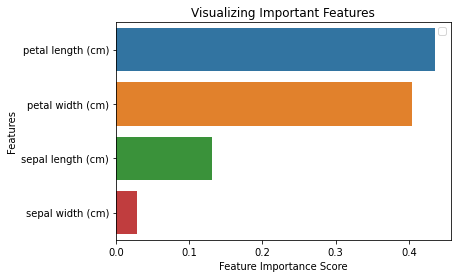

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

## add labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

## Generating Model on Selected Features

In [86]:
# train test split
from sklearn.model_selection import train_test_split

## split dataset into features and labels
X=data[['petal_length', 'petal_width', 'sepal_length']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=5)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


## create gaussian classifier
clf=RandomForestClassifier(n_estimators=100)

## train model
clf.fit(X_train, y_train)

## predict test set
y_pred=clf.predict(X_test)

## model accuracy
print(f'Accuracy : {metrics.accuracy_score(y_test, y_pred)}')

Accuracy : 0.9428571428571428


# SVM

In [88]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

In [89]:
print(f'Features : {cancer.feature_names}')

print(f'\nLabels : {cancer.target_names}')

Features : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Labels : ['malignant' 'benign']


In [90]:
cancer.data.shape

(569, 30)

In [91]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [92]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [93]:
## splitting data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)

In [94]:
## generating model

from sklearn import svm

clf = svm.SVC(kernel='linear') # linear kernel

## train models
clf.fit(X_train, y_train)

## predict response for test dataset
y_pred = clf.predict(X_test)

In [95]:
## evaluating model

from sklearn import metrics

print(f'Accuracy : {metrics.accuracy_score(y_test, y_pred)}')

Accuracy : 0.9649122807017544


In [96]:
## checking the precision and recall model
print(f'Precision : {metrics.precision_score(y_test, y_pred)}')

print(f'Recall : {metrics.recall_score(y_test, y_pred)}')

Precision : 0.9811320754716981
Recall : 0.9629629629629629


# Multiple Algorithm on Dataset

In [97]:
import pandas as pd
import numpy as np

In [99]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [100]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [101]:
print('Train Data : ')
print(train.isnull().sum(), '\n')

Train Data : 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 



In [102]:
train.fillna(train.mean(),inplace = True) 
train.isna().sum() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
train.Gender.fillna(train.Gender.mode()[0], inplace = True)
train.Married.fillna(train.Married.mode()[0], inplace = True)
train.Dependents.fillna(train.Dependents.mode()[0], inplace = True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace = True)  
train.isna().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [104]:
train.Loan_Amount_Term = np.log(train.Loan_Amount_Term)

In [105]:
X=train.drop('Loan_Status', 1)
y=train.Loan_Status

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [106]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)

In [107]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [108]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

In [110]:
## LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [111]:
pred_cv = model.predict(x_cv)

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_cv, pred_cv))
matrix = confusion_matrix(y_cv, pred_cv)
print(matrix)

0.7479674796747967
[[17 24]
 [ 7 75]]


In [113]:
## DECISION TREE ALGORITHM

from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [114]:
pred_cv1 = dt.predict(x_cv)

In [115]:
print(accuracy_score(y_cv,pred_cv1))
matrix1 = confusion_matrix(y_cv,pred_cv1)
print(matrix1)

0.7235772357723578
[[17 24]
 [10 72]]


In [116]:
## RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [117]:
pred_cv2 = rf.predict(x_cv)

In [118]:
print(accuracy_score(y_cv, pred_cv2))
matrix2 = confusion_matrix(y_cv, pred_cv2)
print(matrix2)

0.7804878048780488
[[17 24]
 [ 3 79]]


In [119]:
## SUPPORT VECTOR MACHINE 

from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC()

In [120]:
pred_cv3 = svm_model.predict(x_cv)

In [121]:
print(accuracy_score(y_cv, pred_cv3))
matrix3 = confusion_matrix(y_cv, pred_cv3)
print(matrix3)

0.6666666666666666
[[ 0 41]
 [ 0 82]]


In [122]:
## NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(x_train, y_train)

pred_cv4 = nb.predict(x_cv)

print(accuracy_score(y_cv, pred_cv4))
matrix4 = confusion_matrix(y_cv, pred_cv4)
print(matrix4)

0.7479674796747967
[[16 25]
 [ 6 76]]


In [123]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)

pred_cv5 = kNN.predict(x_cv)

print(accuracy_score(y_cv, pred_cv5))
matrix5 = confusion_matrix(y_cv, pred_cv5)
print(matrix5)

0.6260162601626016
[[ 5 36]
 [10 72]]


In [124]:
print('Summary accuracy score : ')
print('Logistic Regression : ', accuracy_score(y_cv,pred_cv))
print('Decision Tree : ', accuracy_score(y_cv,pred_cv1))
print('Random Forest : ', accuracy_score(y_cv,pred_cv2))
print('Support Vector Machine : ', accuracy_score(y_cv,pred_cv3))
print('Naive Bayes : ', accuracy_score(y_cv,pred_cv4))
print('K-Nearest Neighbors: ', accuracy_score(y_cv,pred_cv5))

Summary accuracy score : 
Logistic Regression :  0.7479674796747967
Decision Tree :  0.7235772357723578
Random Forest :  0.7804878048780488
Support Vector Machine :  0.6666666666666666
Naive Bayes :  0.7479674796747967
K-Nearest Neighbors:  0.6260162601626016


In [125]:
#Write test results in csv file

predictions = pd.DataFrame(pred_cv2, columns=['predictions']).to_csv('H8_NB_Credit_Predictions.csv')